# Data Visualization Using Matplotlib


It allows us to get instant insight into data and the identification of patterns,
trends, and outliers are the primary uses of charting libraries

When deciding which stock may be suitable for which algorithmic trading strategy,
creating a chart of the stock price is the first step - some strategies are suitable only for
trendigng stocks, some for mean-reversion stocks, and so on.

This chapter covers the following main topics
* Creating figures and subplots
* Enriching plots with colors, markers and line styles
* Enriching axes with ticks, labels and legends
* Enriching data points with annotations
* Saving plots to files
* Charting a pandas DataFrame with Matplotlib


# Creating figures and subplots

Matplotlib supports plotting multiple charts(subplots) on a single figure, which is 
Matplotlib's term for the drawing canvas

# Defining figures' subplots



In [1]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(12,6),dpi=200)

<Figure size 2400x1200 with 0 Axes>

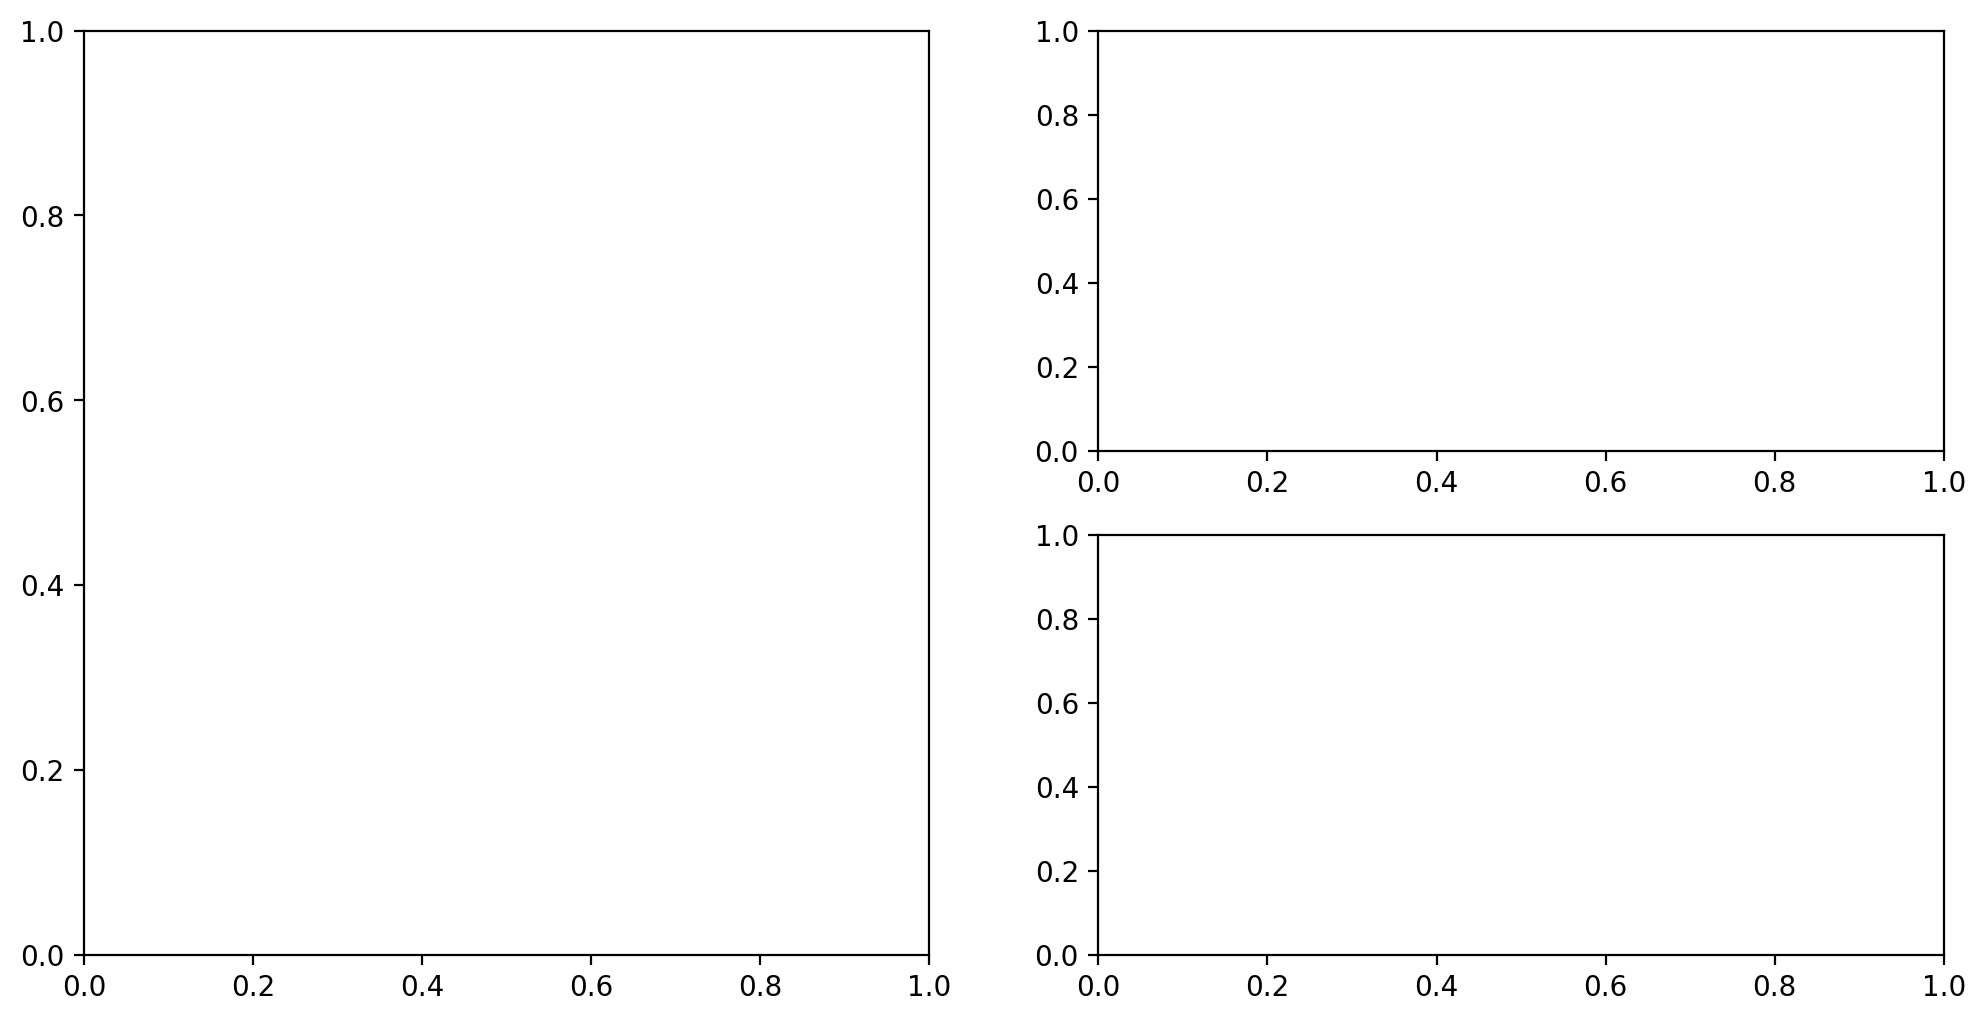

In [2]:
# Before we plot anything on this figure, we need to add subplots to create space
# for them. The matplotlib.pyplot.figure.add_subpllot() method lets us do that by
# specifying the size of the subplot and the location


# The following code adds a subplot of size  1x2 grids on the left, then subplot of 2x2
# the top right, and a subplot of 2x2 on the bottom right


ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,4)

fig

# In all reports, physical space on the page is very expensive,
# so creating charts like the preceding is the best practice

# Plotting in subplots

Let's use numpy.linspace() to generate evenly spaced values on the x-axis,and 
then the numpy.square(), numpy.sin() and numpy.cos() methods to generate
corresponding values on the y axis

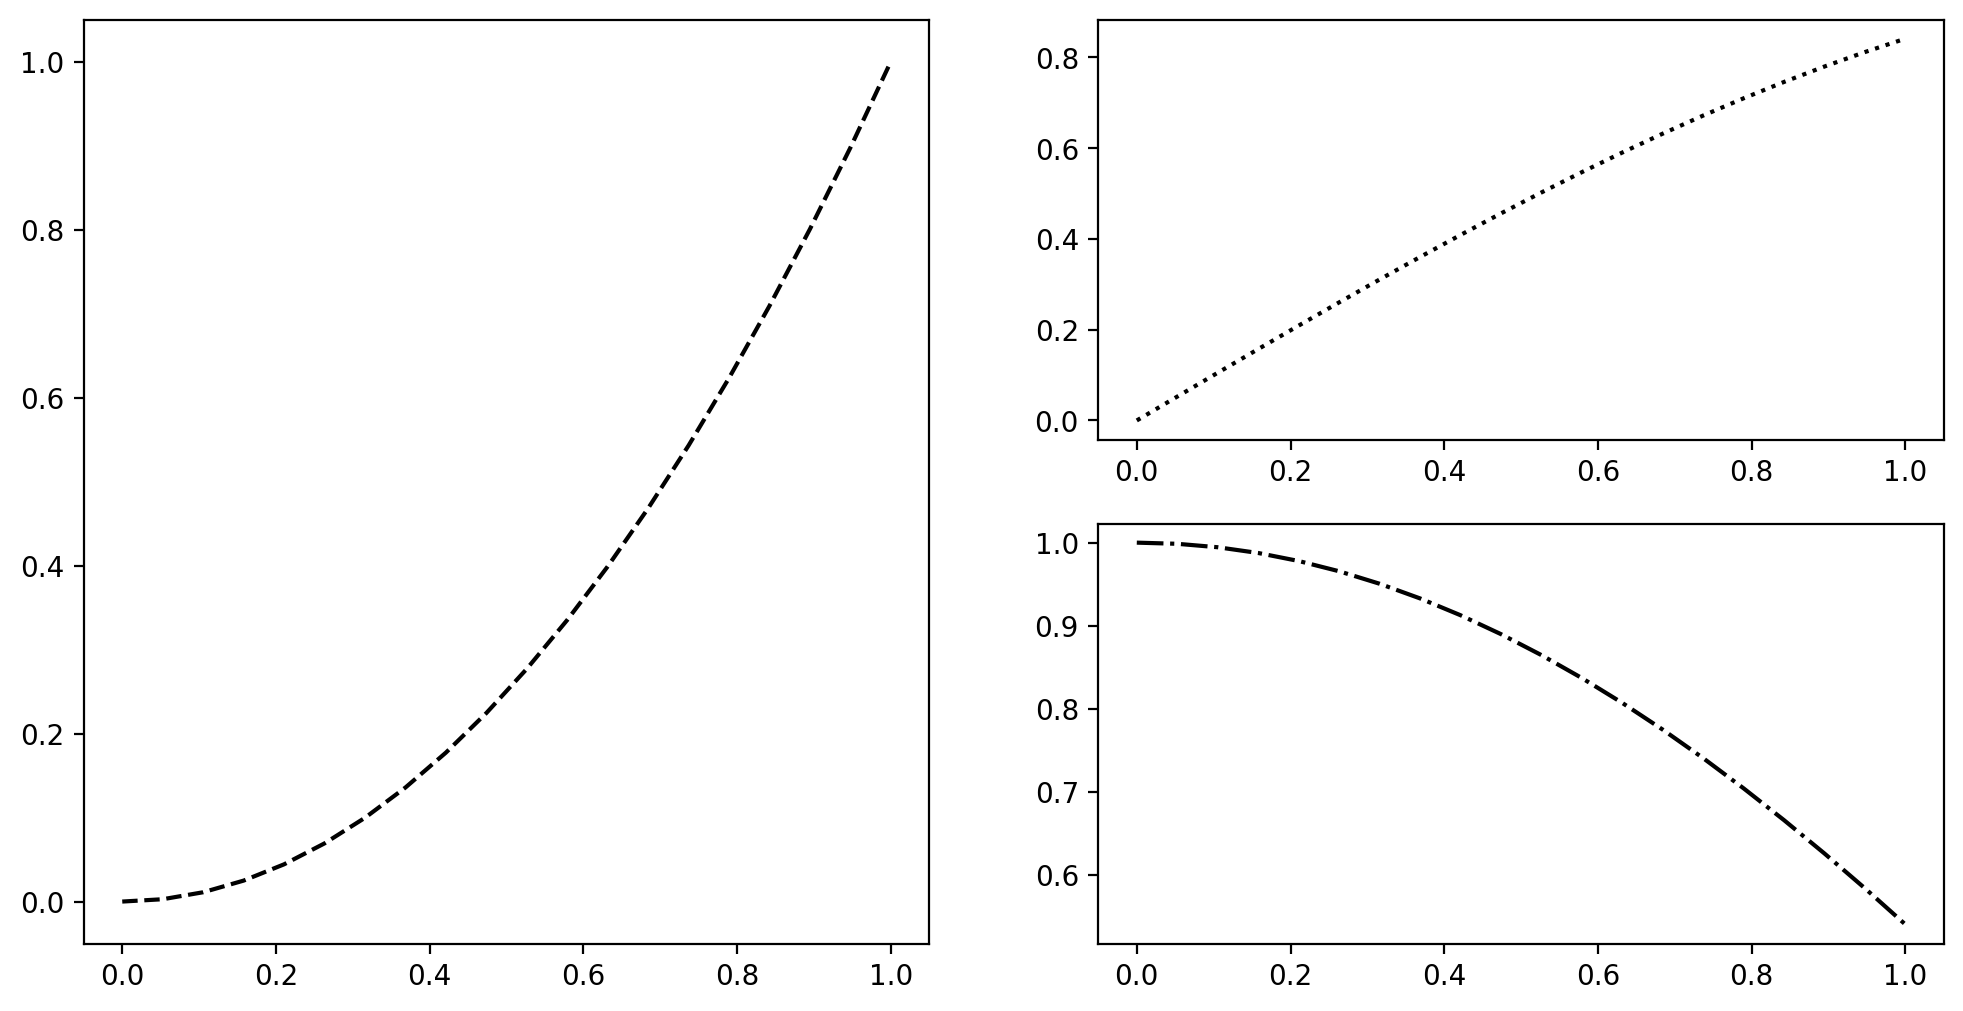

In [3]:
import numpy as np

x = np.linspace(0,1,num=20)
y1 = np.square(x)
ax1.plot(x,y1,color='black',linestyle='--')


y2 = np.sin(x)
ax2.plot(x,y2,color='black',linestyle=':')

y3 = np.cos(x)
ax3.plot(x,y3,color='black',linestyle='-.')

fig



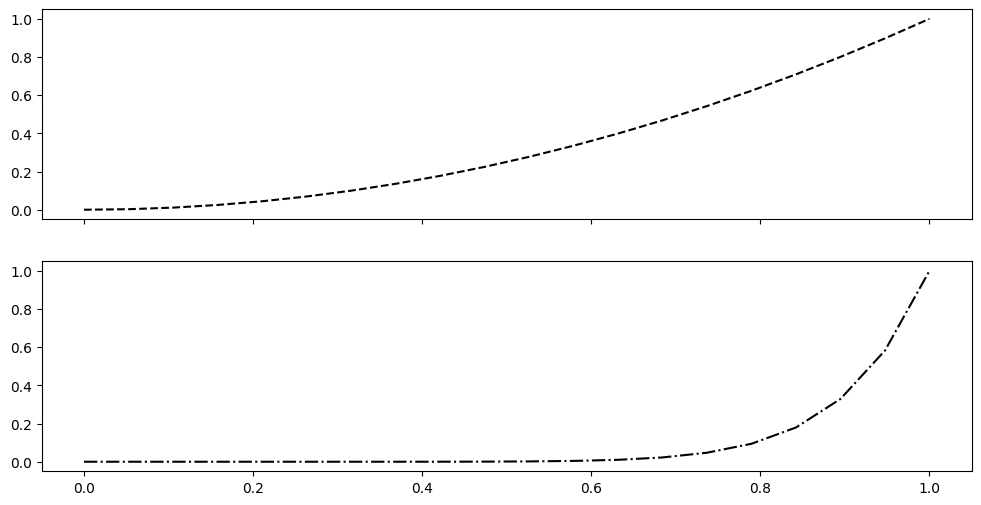

In [4]:
# The sharex = parameter can be passed when creating subplots to specify that all the subplots should share 
# the same x axis


fig, (ax1 , ax2) = plt.subplots(2,figsize=(12,6),sharex= True)

ax1.plot(x,y1,color='black',linestyle='--')
y2 = np.power(x,10)
ax2.plot(x,y2,color='black',linestyle='-.')

# Enriching plots with colors, markers and line styles

* The color = parameter is used to asign colors
* The linewidth = parameter is used to change the width/thickness of the lines
* The marker = parameter is used to change the width/ thickness of the lines
* THe markersize = paramter changes the size of these markets
* THe alpha = parameter is used to modify the transparency
* The drawstyle = parameter changes the default line connectivity to step 
  connectivity between data points for one plot.

  

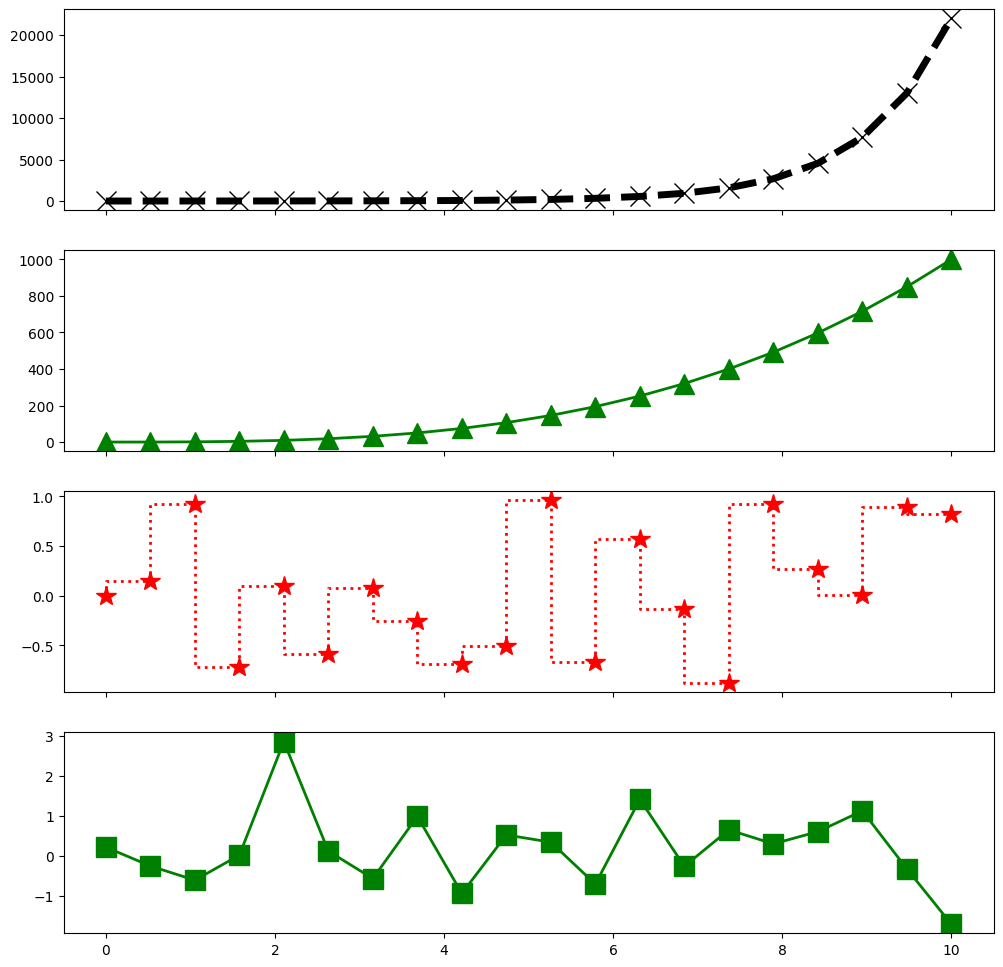

In [5]:
fig , (ax1,ax2,ax3,ax4) = plt.subplots(4,figsize=(12,12),sharex=True)

x = np.linspace(0,10,num=20)
y1 = np.exp(x)
y2 = x ** 3
y3 = np.sin(y2)
y4 = np.random.randn(20)

ax1.plot(x,y1,color='black',linestyle='--',linewidth = 5,marker='x',markersize=15)
ax2.plot(x,y2,color='green',linestyle='-',linewidth=2,marker='^',markersize = 15)
ax3.plot(x,y3,color='red',linestyle=':',linewidth=2,marker='*',markersize = 15,drawstyle='steps')
ax4.plot(x,y4,color='green',linestyle='-',linewidth=2,marker='s',markersize = 15)

# Enriching axes with ticks, labels and legends

The charts can be further improved by customizing the axes via ticks,limits and labels
The matplotlib.pyplot.xlim() method sets the range of values on the x axis
Th matplotlib.pyplot.xticks() method specifies where the ticks show up on the x - axis.




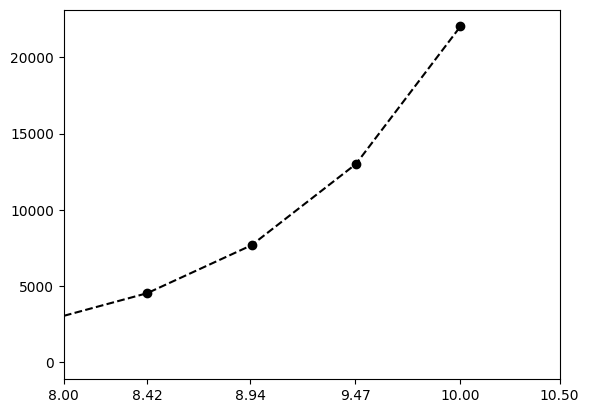

In [6]:
plt.xlim([8,10.5])
plt.xticks([8,8.42,8.94,9.47,10,10.5])
plt.plot(x,y1,color='black',linestyle='--',marker='o')

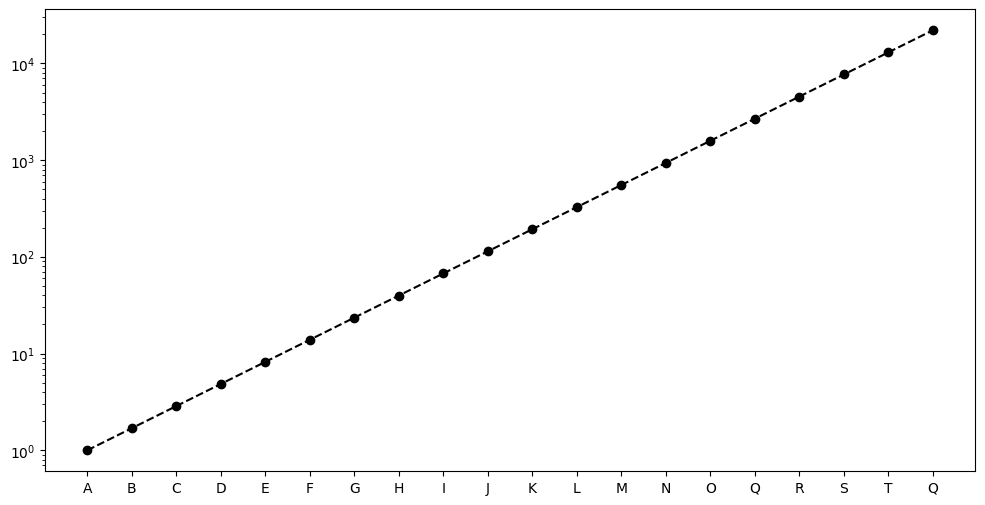

In [7]:
# WE can also change the scale of one of the axis to non-linear using the matplotlib
# axes.set_yscale() methhod

fig, ax = plt.subplots(1,figsize=(12,6))
ax.set_yscale('log')
ax.set_xticks(x)
ax.set_xticklabels(list('ABCDEFGHIJKLMNOQRSTQ'))
ax.plot(x,y1,color='black',linestyle='--',marker='o',label='y=exp(x')

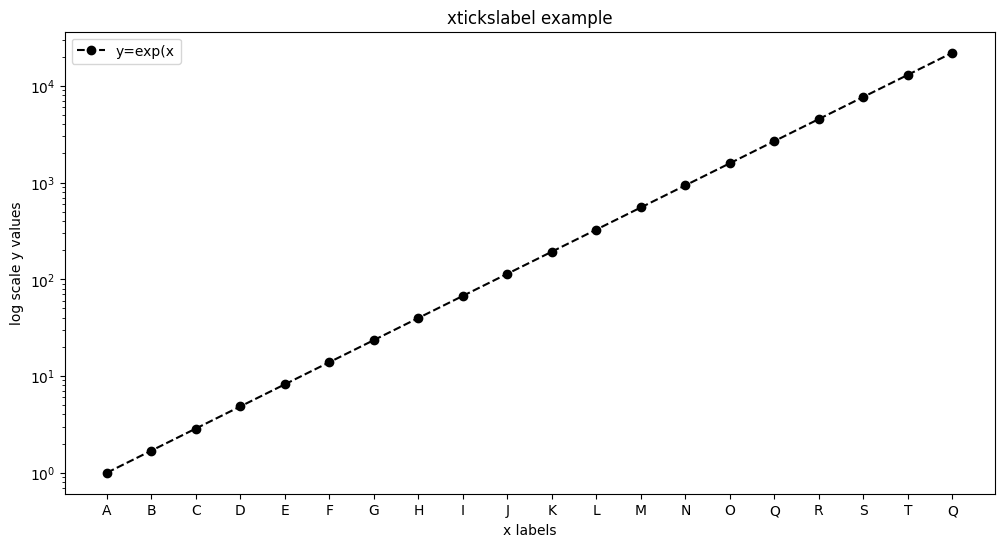

In [8]:
# The logarithmic scales in charts are useful if the dataset covers a large range of values or 
# we want to communicate percentage change or multiplicative factors


ax.set_title('xtickslabel example')
ax.set_xlabel('x labels')
ax.set_ylabel('log scale y values')
ax.legend(loc='best')
fig

# Enriching data points with annotations

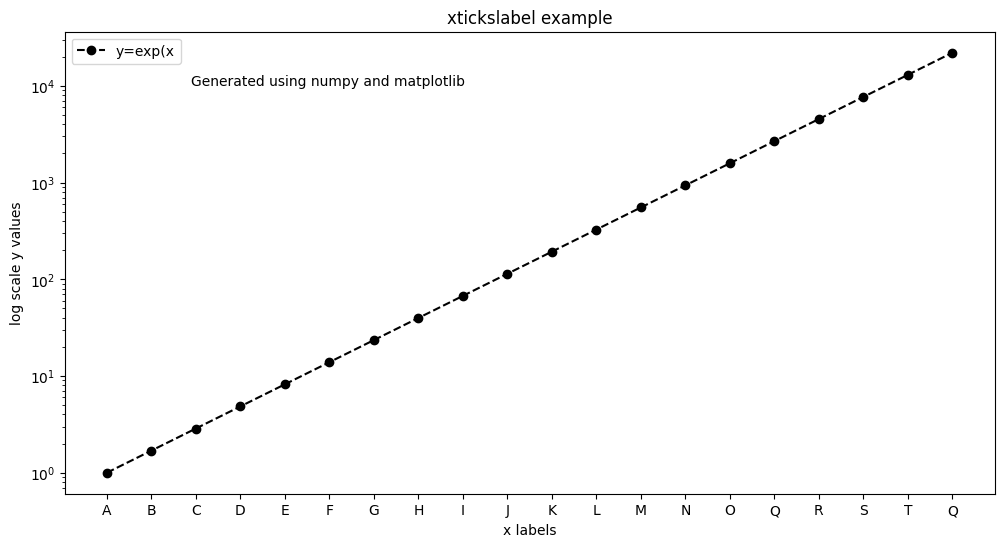

In [9]:
# The matplotlib.Axes.text() method adds a text box to our plots

ax.text(1,10000,'Generated using numpy and matplotlib')
fig

The matplotlib.Axes annotate() method provides control over the annotations

* The xy = parameter specifies the location of the data point.
* The xytext = parameter specifies the location of the text box.
* The arrowprops = parameter accepts a dictionary specifying parameters to control the arrow 
    from the text box to the data point.
* The facecolor=parameter specifies the color and the shrink=parameter specifies the size of the arrow
* The horizontalalignments and verticalalignment = paramters specify the orientation of hte text box relative 
  teh orientation of the text box relative to the data point.

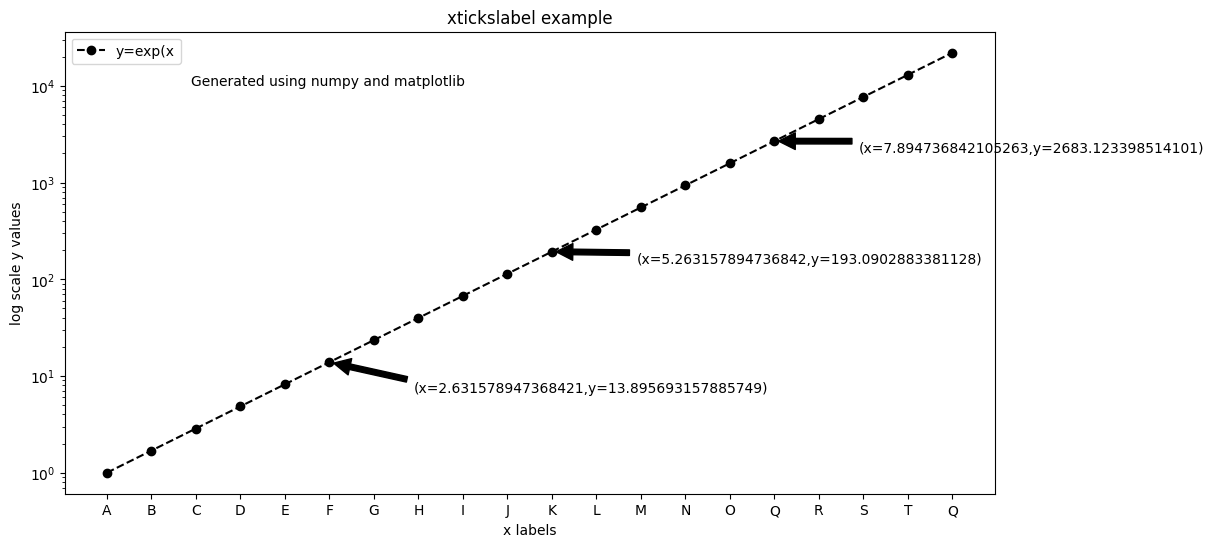

In [10]:
for i in [5,10,15]:
    s = '(x=' + str(x[i]) + ',y=' + str(y1[i]) +')'
    ax.annotate(s,xy=(x[i],y1[i]),xytext=(x[i] + 1, y1[i]-5),
    arrowprops = dict(facecolor='black',
    shrink=0.05),
    horizontalalignment ='left',
    verticalalignment = 'top')

fig

Drawing attention to the key data points helps the reader focus on the message of the chart.

The matplotlib.Axes.add_patch() method can be used to add different shape annotaions

* The xy = parameter to specify the location
* The radius = parameter to specify the circle radius
* The color = parameter to specify the color of the circle



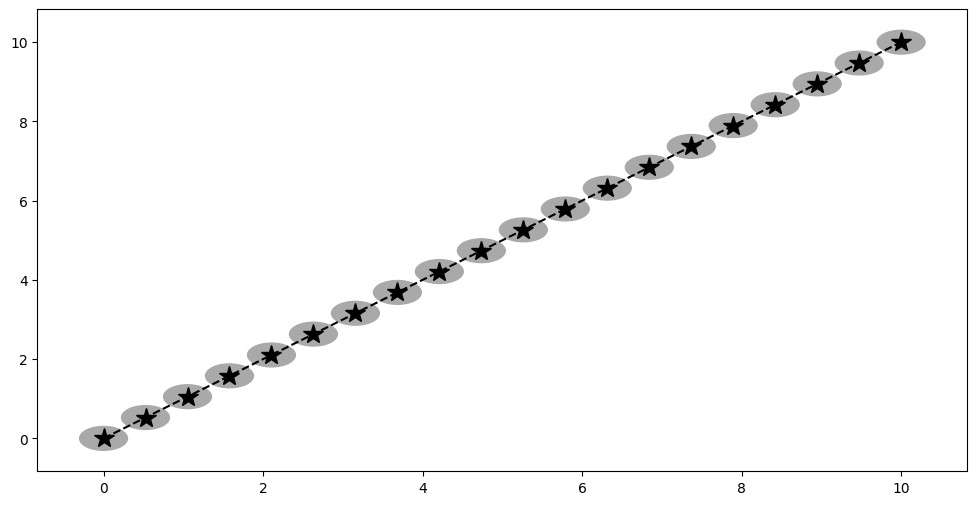

In [11]:
fig, ax = plt.subplots(1,figsize=(12,6))
ax.plot(x,x,linestyle='--',color='black',marker='*',markersize=15)
for val in x:
    ax.add_patch(plt.Circle(xy=(val,val),radius=0.3,color='darkgray'))

# Saving plots to files

The matplotlib.pyplot.figure object enables us to save plots to disk in different file formats
with many size and resolution specifiers, such as the dpi parameter

In [12]:
fig.savefig('fig.png',dpi=200)

# Charting a pandas DataFrame with Matplotlib

The pandas library plotting capabilities for Series and DataFrame objects using Matplotlib


In [13]:
import pandas as pd

df = pd.DataFrame(index=range(1000),columns=['Cont value','Delta1 value','Delta2 value','Cat value'])
df['Cont value'] = np.random.randn(1000).cumsum()
df['Delta1 value'] = np.random.randn(1000)
df['Delta2 value'] = np.random.randn(1000)
df['Cat value'] = np.random.permutation(['Very high','High','Medium','Low','Very LOw']*200)
df['Delta1 discrete'] = pd.cut(df['Delta1 value'],labels=[-2,-1,0,1,2],bins=5).astype(np.int64) 
df['Delta2 discrete'] = pd.cut(df['Delta2 value'],labels=[-2,-1,0,1,2],bins=5).astype(np.int64)

df

,Cont value,Delta1 value,Delta2 value,Cat value,Delta1 discrete,Delta2 discrete
0,0.444362,-1.065029,0.886246,Very LOw,-1,1
1,2.282753,0.922427,0.214745,High,1,0
2,2.675695,-1.280563,0.400174,Very high,-1,0
3,3.874055,-1.834675,-1.100097,Medium,-2,-1
4,4.281619,1.323662,-0.148734,High,1,0
...,...,...,...,...,...,...
995,48.203845,1.026674,-1.304857,Very high,1,-1
996,48.529056,1.730539,0.151577,Medium,1,0
997,49.537631,1.805983,0.282851,Very LOw,1,0
998,48.030189,-1.164582,0.512958,Low,-1,0


# Creating line plots of a DataFrame column

<AxesSubplot: >

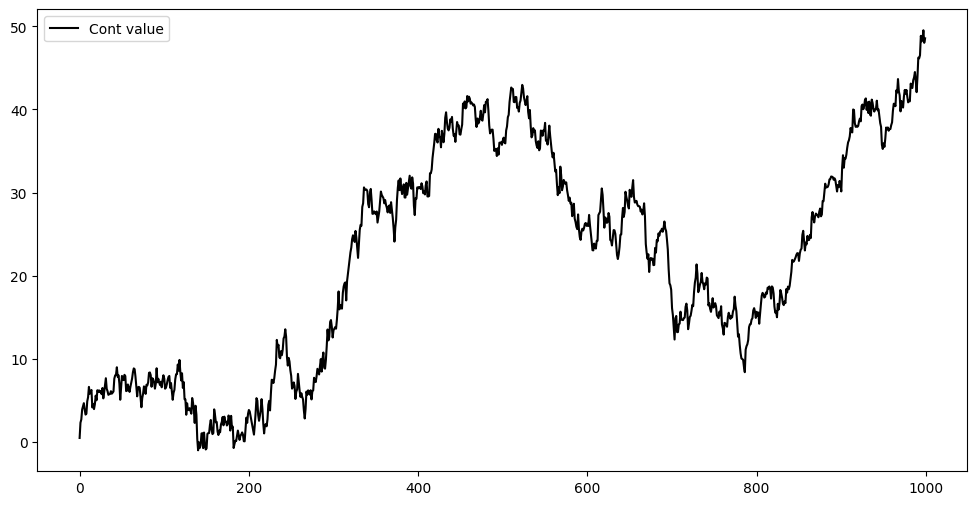

In [14]:

df.plot(y='Cont value',kind='line',color='black',linestyle='-',figsize=(12,6))




# Creating bar plots of a DataFrame column

The pandas.DataFrame.plot() method can be used with the kind='bar' parameter to build a bar chart

Let's first group the by the 'Cat value' value and then plot the Delta1 discreate value counts in a bar chart


<AxesSubplot: title={'center': 'Occurence by (Cat,Delta1)'}, xlabel='Cat value,Delta1 discrete'>

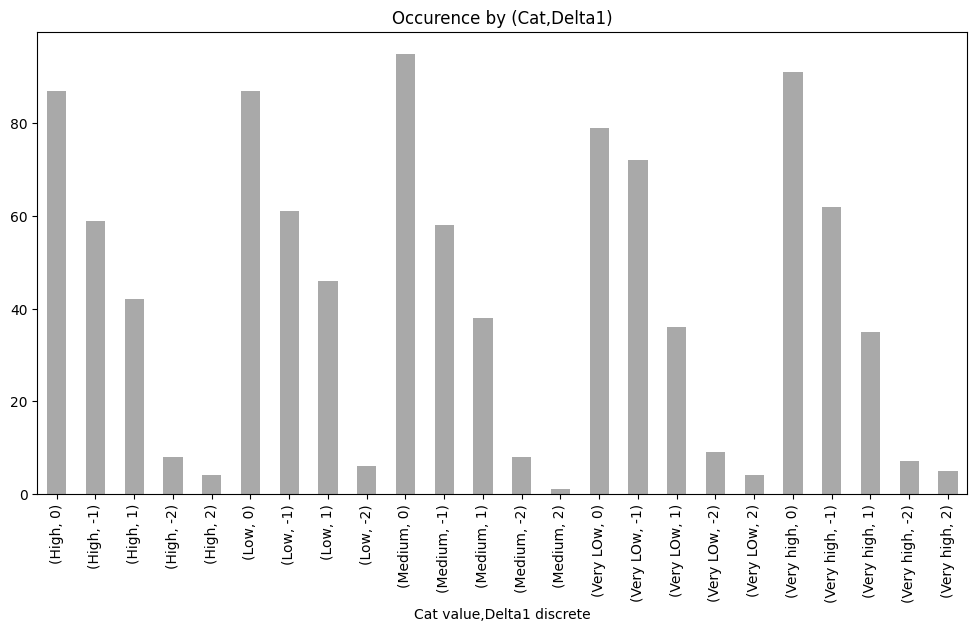

In [15]:
df.groupby('Cat value')['Delta1 discrete'].value_counts().plot(kind='bar',color='darkgray',title = 'Occurence by (Cat,Delta1)',figsize=(12,6))


<AxesSubplot: title={'center': 'Occurence by (Delta2,Cat)'}, ylabel='Delta2 discrete,Cat value'>

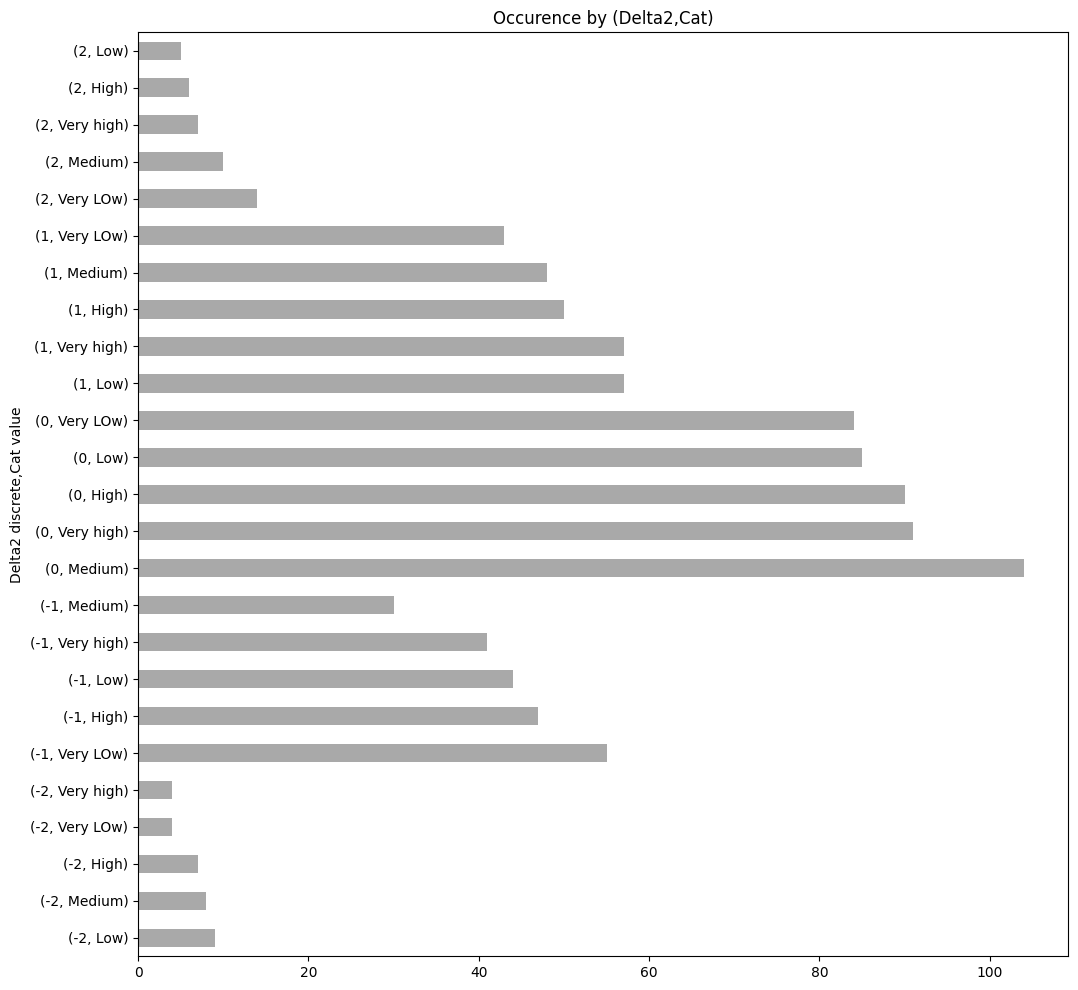

In [16]:
# The kind ='barh' parameter builds a horizontal bar plot instead of a vertical one

df.groupby('Delta2 discrete')['Cat value'].value_counts().plot(kind='barh',color='darkgray',title = 'Occurence by (Delta2,Cat)',figsize=(12,12))

# Creating histograme and density plot of a DataFrame column

The kind='hist' parameter in the pandas.DataFrame.plot() method builds a histogram


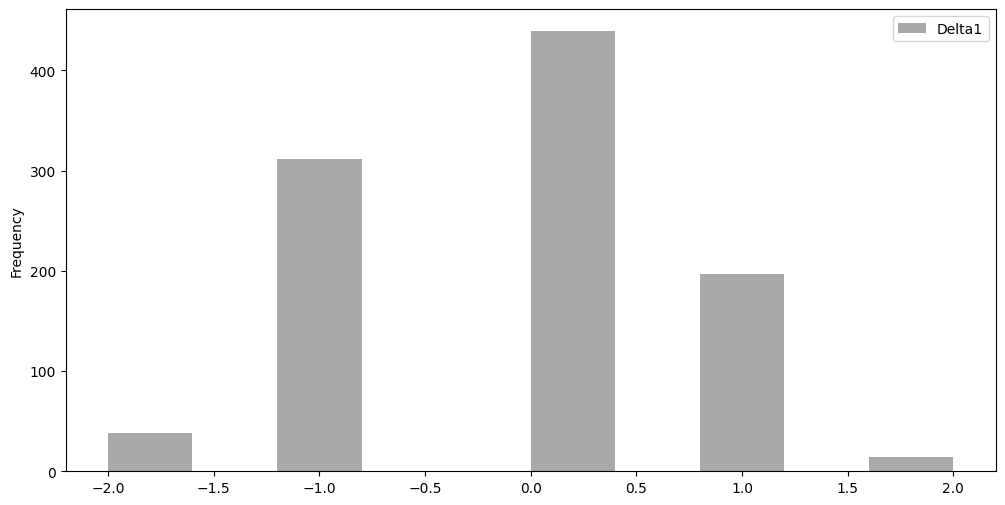

In [17]:
# Lets create a histogram of the Delta1 discrete values

df['Delta1 discrete'].plot(kind='hist',color='darkgray',figsize=(12,6),label='Delta1')

plt.legend()

we can build a Probability density function(PDF) by specifying the kind='kde' parameter,
which generates PDF using Kernel Densityy Estimation(KDE) of the Delta2 discrete value



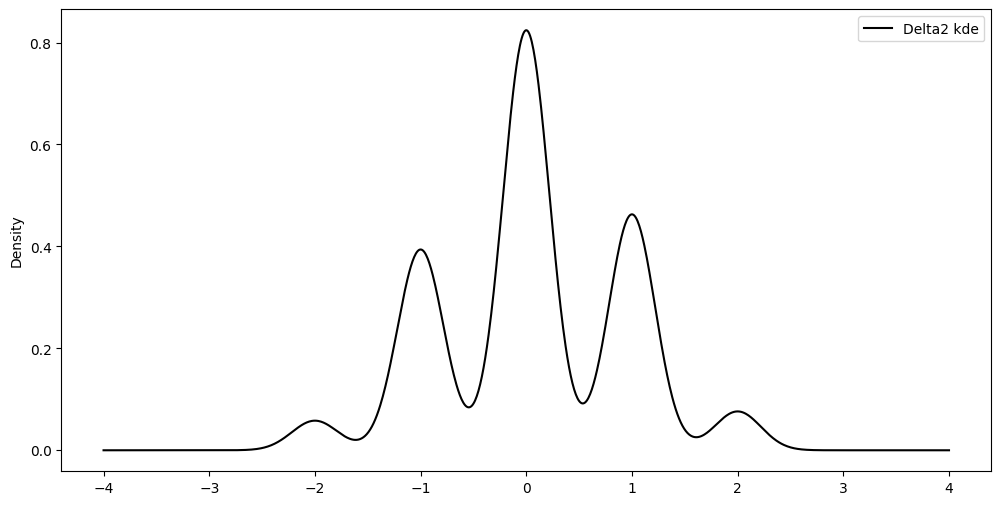

In [18]:
df['Delta2 discrete'].plot(kind='kde',color='black',figsize=(12,6),label='Delta2 kde')

plt.legend()

# Creating scatter plots of two DataFraem columns

Scatter plots from the pandas.DataFrame.plot() method are generated using the kind='scatter' parameter

The following code block plots a scatter plot between the Delta1 and Delta2 values



<AxesSubplot: xlabel='Delta1 value', ylabel='Delta2 value'>

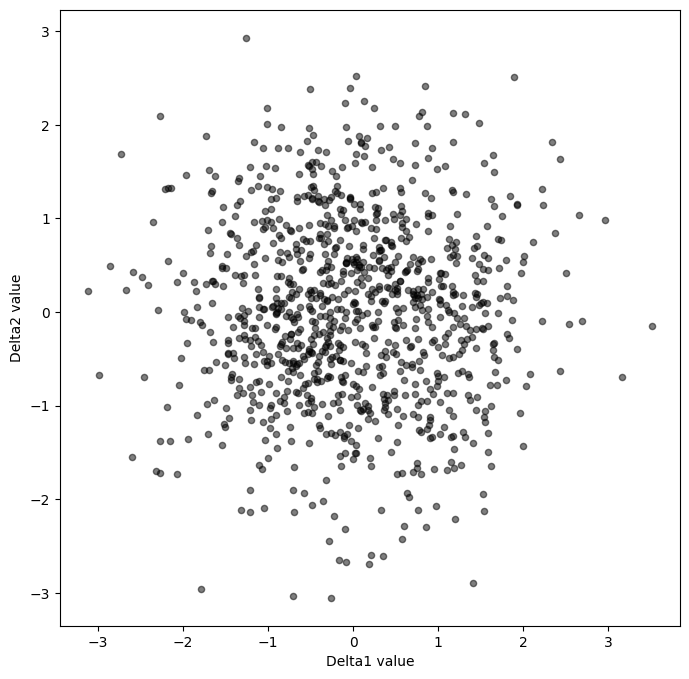

In [19]:
# The following code block plots a scatter plot between the Delta1 and Delta2 values

df.plot(kind='scatter',x='Delta1 value',y='Delta2 value', alpha=0.5,color='black', figsize=(8,8))

array([[<AxesSubplot: xlabel='Delta1 value', ylabel='Delta1 value'>,
        <AxesSubplot: xlabel='Delta2 value', ylabel='Delta1 value'>],
       [<AxesSubplot: xlabel='Delta1 value', ylabel='Delta2 value'>,
        <AxesSubplot: xlabel='Delta2 value', ylabel='Delta2 value'>]],
      dtype=object)

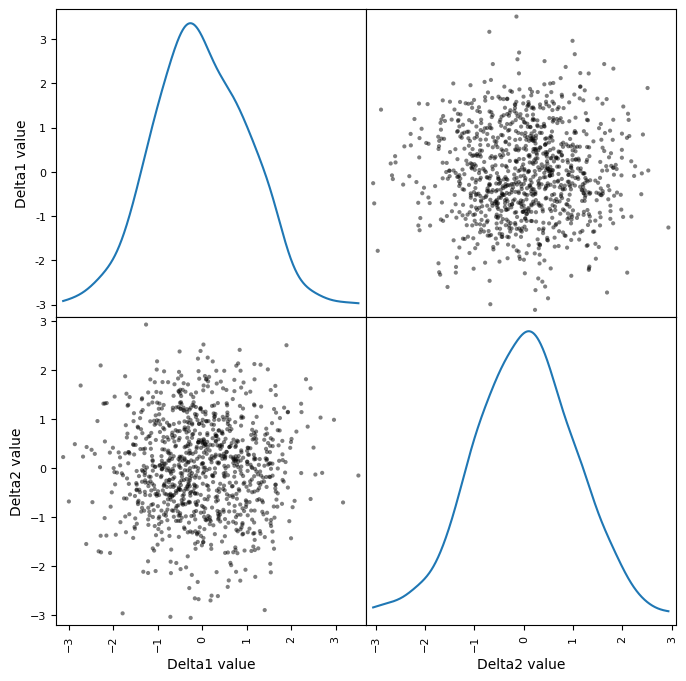

In [20]:
# The pandas.plotting.scatter_matrix() method builds a matrix of scatter plots
# on non- diagonal entries and histograme

pd.plotting.scatter_matrix(df[['Delta1 value','Delta2 value']],diagonal='kde',color='black',figsize=(8,8))

# Scatter plots/ Scatter matrices  are used to observer relationships between two variables

# Plottign time series of data

The following code block creates a pandas DataFrame containing prices for 
two hypothetical trading instruments. A and B. The DataFrame is indexed by the 
DataTimeIndex objects representing daily dates from 1992 to 2012




In [32]:
dates = pd.date_range('1992-01-01','2012-10-22')
time_series = pd.DataFrame(index=dates,columns=['A','B'])
time_series['A'] = np.random.randint(low = -100,high=101,size=len(dates)).cumsum() + 5000
time_series['B'] = np.random.randint(low = -75,high=76,size=len(dates)).cumsum() + 5000

time_series

,A,B
1992-01-01,4988,5028
1992-01-02,5013,5097
1992-01-03,4934,5154
1992-01-04,4957,5194
1992-01-05,4961,5258
...,...,...
2012-10-18,-9517,4120
2012-10-19,-9528,4127
2012-10-20,-9546,4187
2012-10-21,-9569,4207


# Plotting prices in a line plot

First, let's plot the daily prices for A and B over 20 years with line plots


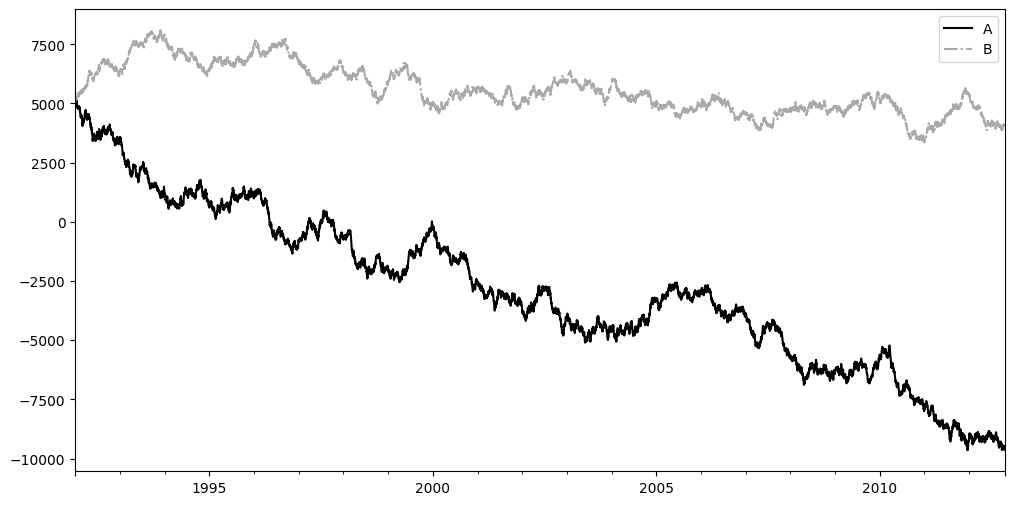

In [33]:
time_series['A'].plot(kind='line',linestyle='-',color='black',figsize=(12,6),label='A')
time_series['B'].plot(kind='line',linestyle = '-.',color='darkgray',figsize=(12,6),label='B')


plt.legend()

# Plotting price change histograms

The usual next stop in financtila time series is to inspect changes in price over some duration

The following code block generates six new fields representing changes in price over 1 day,5 days and 20 days

using the pandas.DataFrame.shift() and panas.DataFrame.fillna()

In [42]:
time_series['A_1_delta'] = time_series['A'].shift(-1) - time_series['A'].fillna(0)
time_series['B_1_delta'] = time_series['B'].shift(-1) - time_series['B'].fillna(0)

time_series['A_5_delta'] = time_series['A'].shift(-5) - time_series['A'].fillna(0)
time_series['B_5_delta'] = time_series['B'].shift(-5) - time_series['B'].fillna(0)

time_series['A_20_delta'] = time_series['A'].shift(-20) - time_series['A'].fillna(0)
time_series['B_20_delta'] = time_series['B'].shift(-20) - time_series['B'].fillna(0)



time_series_deltas = time_series[['A_1_delta','B_1_delta','A_5_delta','B_5_delta','A_20_delta','B_20_delta']].dropna()
time_series_deltas

,A_1_delta,B_1_delta,A_5_delta,B_5_delta,A_20_delta,B_20_delta
1992-01-01,25.0,69.0,41.0,265.0,-76.0,243.0
1992-01-02,-79.0,57.0,-28.0,176.0,-163.0,185.0
1992-01-03,23.0,40.0,84.0,51.0,-58.0,132.0
1992-01-04,4.0,64.0,17.0,18.0,-85.0,130.0
1992-01-05,68.0,35.0,95.0,11.0,-174.0,49.0
...,...,...,...,...,...,...
2012-09-28,13.0,47.0,167.0,79.0,93.0,192.0
2012-09-29,88.0,14.0,57.0,39.0,69.0,152.0
2012-09-30,-59.0,-27.0,40.0,49.0,-37.0,198.0
2012-10-01,86.0,39.0,40.0,142.0,-1.0,245.0


In [ ]:
# we can plot the price change histograme for A based on what we have learned in this
# chapter with the following block of code

#time_series_delt's['A_20_de'ta'].plot(ki'd='h)